## COMP 6934 Winter 2025 In class Work 8

Using melt/pivot methods with Pandas.

The dataset is the same as problem set 2 through 6, taken from <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023>

But I've improved the data set by removing the strange degree symbols in the column names. Get the improved data set weather.zip

If the numpy library is not aleady installed, you may need to install it.

## Problem Set 8

Using a pivot or melt is often a better alternative and less confusing than grouping.

Here is a pivot exercise, although you could achieve a similar result with 

Don't forget to deal with bad data values, but only from the columns we are plotting. Don't drop records with bad data if the columns we are using are good data.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
al = pd.read_csv('Data/AB_weather.csv')
bc = pd.read_csv('Data/BC_weather.csv')
on = pd.read_csv('Data/ON_weather.csv')
qc = pd.read_csv('Data/QC_weather.csv')

C:\Users\Mas85\AppData\Local\Temp\ipykernel_956\585406792.py:1: DtypeWarning: Columns (3,20,22,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  al = pd.read_csv('Data/AB_weather.csv')
C:\Users\Mas85\AppData\Local\Temp\ipykernel_956\585406792.py:2: DtypeWarning: Columns (3,29) have mixed types. Specify dtype option on import or set low_memory=False.
  bc = pd.read_csv('Data/BC_weather.csv')
C:\Users\Mas85\AppData\Local\Temp\ipykernel_956\585406792.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  on = pd.read_csv('Data/ON_weather.csv')
C:\Users\Mas85\AppData\Local\Temp\ipykernel_956\585406792.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  qc = pd.read_csv('Data/QC_weather.csv')


In [34]:
bc['Station Name'].unique()

array(['CHEMAINUS', 'COWICHAN LAKE FORESTRY', 'LAKE COWICHAN',
       'DISCOVERY ISLAND', 'ESQUIMALT HARBOUR', 'GALIANO NORTH',
       'MALAHAT', 'METCHOSIN', 'NORTH COWICHAN', 'NORTH PENDER ISLAND',
       'PORT RENFREW', 'RACE ROCKS', 'SAANICHTON CDA',
       "SALTSPRING ST MARY'S L", 'SAANICHTON MT NEWTON', 'SATURNA CAPMON',
       'SATURNA CAPMON CS', 'SATURNA ISLAND CS', 'SHAWNIGAN LAKE',
       'SHERINGHAM POINT', 'VICTORIA UNIVERSITY CS',
       'VICTORIA GONZALES CS', 'VICTORIA INTL A', 'VICTORIA HARBOUR A',
       'WILLIAM HEAD', 'BALLENAS ISLAND', 'CAMPBELL RIVER A',
       'CAPE MUDGE', 'CHATHAM POINT', 'CHROME ISLAND', 'COMOX A',
       'CORTES ISLAND TIBER BAY', 'COURTENAY GRANTHAM',
       'COURTENAY PUNTLEDGE', 'ENTRANCE ISLAND', 'FANNY ISLAND',
       'HERIOT BAY SE', 'LITTLE QUALICUM HATCHERY', 'MUD BAY',
       'NANAIMO A', 'NANAIMO CITY YARD', 'PINE ISLAND', 'PORT HARDY A',
       'QUALICUM BEACH AIRPORT', 'QUALICUM R FISH RESEARCH',
       'QUINSAM RIVER HATCHERY', 

In [36]:
# Assuming the datasets have a 'Station Name' column
calgary = al[al['Station Name'] == 'CALGARY INTL A']
vancouver = bc[bc['Station Name'] == 'VANCOUVER INTL A']
toronto = on[on['Station Name'] == 'TORONTO CITY']
montreal = qc[qc['Station Name'] == 'MONTREAL INTL A']

In [37]:
# Assuming 'Date/Time' column exists and is datetime formatted
vancouver = vancouver.groupby('Date/Time').agg({'Mean Temp (C)': 'mean', 'Min Temp (C)': 'min', 'Max Temp (C)': 'max'}).reset_index()
calgary = calgary.groupby('Date/Time').agg({'Mean Temp (C)': 'mean', 'Min Temp (C)': 'min', 'Max Temp (C)': 'max'}).reset_index()
toronto = toronto.groupby('Date/Time').agg({'Mean Temp (C)': 'mean', 'Min Temp (C)': 'min', 'Max Temp (C)': 'max'}).reset_index()
montreal = montreal.groupby('Date/Time').agg({'Mean Temp (C)': 'mean', 'Min Temp (C)': 'min', 'Max Temp (C)': 'max'}).reset_index()

In [39]:
merged_data = pd.concat([
    vancouver.assign(City='Vancouver'),
    calgary.assign(City='Calgary'),
    toronto.assign(City='Toronto'),
    montreal.assign(City='Montreal')
])
merged_data

,Date/Time,Mean Temp (C),Min Temp (C),Max Temp (C),City
0,2018-01-01,-0.8,-4.5,3.0,Vancouver
1,2018-01-02,-0.2,-3.3,3.0,Vancouver
2,2018-01-03,1.2,-1.6,4.0,Vancouver
3,2018-01-04,3.6,1.4,5.7,Vancouver
4,2018-01-05,7.2,4.6,9.7,Vancouver
...,...,...,...,...,...
2186,2023-12-27,2.5,0.9,4.0,Montreal
2187,2023-12-28,2.0,0.7,3.2,Montreal
2188,2023-12-29,1.6,0.7,2.4,Montreal
2189,2023-12-30,-1.5,-4.3,1.4,Montreal


In [41]:
merged_data = merged_data.drop_duplicates()

,Date/Time,Mean Temp (C),Min Temp (C),Max Temp (C),City
0,2018-01-01,-0.8,-4.5,3.0,Vancouver
1,2018-01-02,-0.2,-3.3,3.0,Vancouver
2,2018-01-03,1.2,-1.6,4.0,Vancouver
3,2018-01-04,3.6,1.4,5.7,Vancouver
4,2018-01-05,7.2,4.6,9.7,Vancouver
...,...,...,...,...,...
2186,2023-12-27,2.5,0.9,4.0,Montreal
2187,2023-12-28,2.0,0.7,3.2,Montreal
2188,2023-12-29,1.6,0.7,2.4,Montreal
2189,2023-12-30,-1.5,-4.3,1.4,Montreal


In [52]:
# Convert 'Date/Time' column to datetime if not already done
merged_data['Date/Time'] = pd.to_datetime(merged_data['Date/Time'])

In [56]:
merged_data = merged_data[merged_data['Date/Time'].dt.year == 2023]

In [57]:
# Step 5: Pivot the data
pivoted_data = merged_data.pivot(index='Date/Time', columns='City', values='Mean Temp (C)')

In [58]:
pivoted_data

City,Calgary,Montreal,Toronto,Vancouver
Date/Time,,,,
2023-01-01,-2.9,2.4,3.9,5.0
2023-01-02,-5.5,2.1,4.6,2.4
2023-01-03,-6.0,2.6,3.6,2.9
2023-01-04,-5.4,-0.7,3.5,5.5
2023-01-05,-11.1,-3.9,4.0,8.7
...,...,...,...,...
2023-12-27,-0.6,2.5,7.8,9.2
2023-12-28,5.5,2.0,7.0,10.7
2023-12-29,1.6,1.6,4.9,10.0


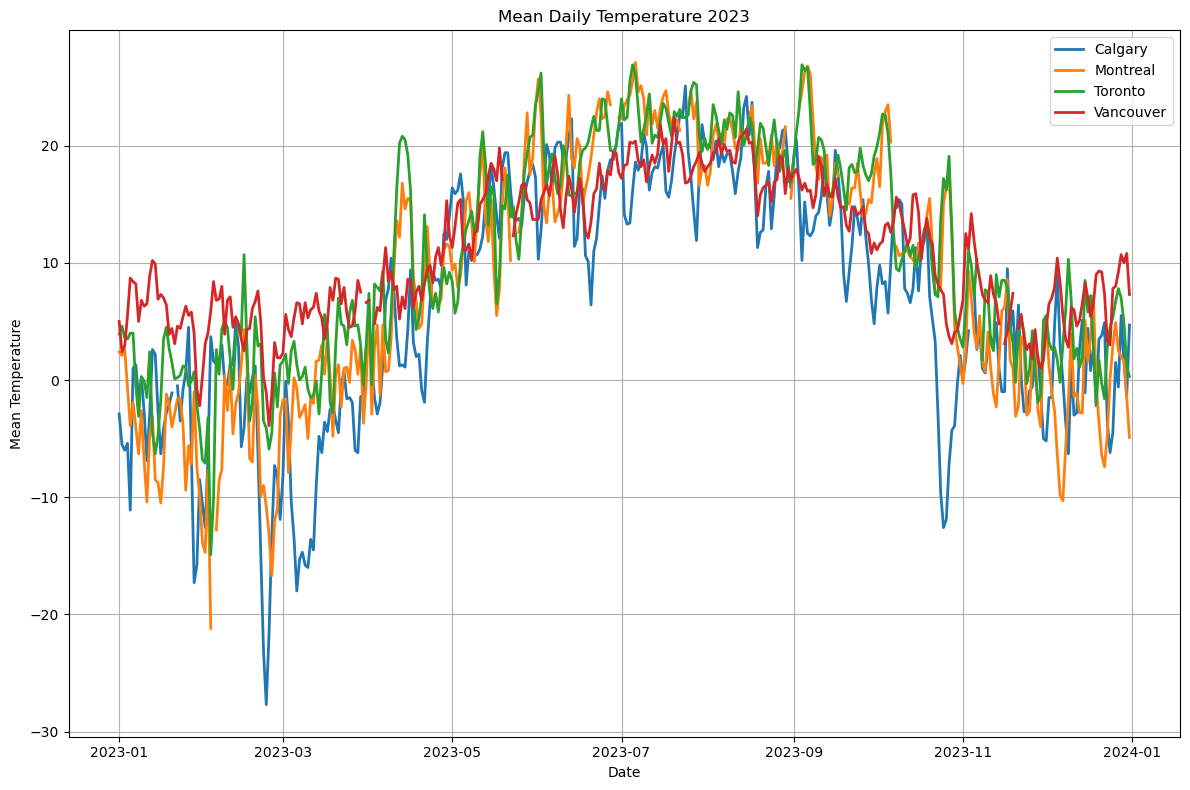

In [62]:
plt.figure(figsize=(12, 8))

plt.plot(pivoted_data['Calgary'],linewidth=2, label='Calgary')
plt.plot(pivoted_data['Montreal'],linewidth=2, label='Montreal')
plt.plot(pivoted_data['Toronto'],linewidth=2, label='Toronto')
plt.plot(pivoted_data['Vancouver'],linewidth=2, label='Vancouver')

plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Daily Temperature 2023')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



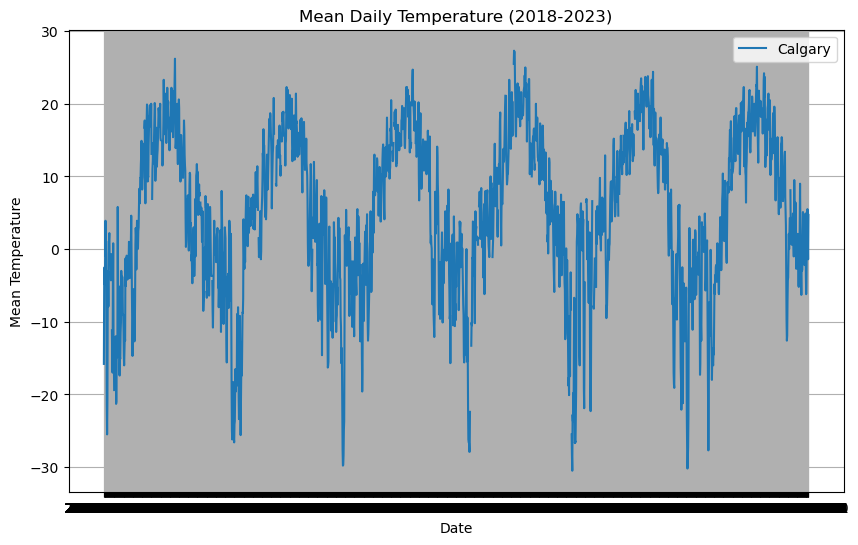

In [43]:
# Step 6: Plot the time series
plt.figure(figsize=(10, 6))
#for city in pivoted_data:
#    plt.plot(pivoted_data[city], label=city)
plt.plot(pivoted_data['Calgary'], label='Calgary')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Daily Temperature (2018-2023)')
plt.legend()
plt.grid()
plt.show()

### Problem 8

Perform the following steps to use pivot() method and make sure your code for each step is spearate and clear 

* Merge data from four Canadian cities into a single data frame
    * Vancouver BC
    * Calgary AL
    * Toronto ON
    * Montreal QC
* Pick one weather station from each city to include in your merged data frame
* Make sure each station is reporting ONE record per day. Reduce the dataset if necessary.
* Pivot the data on station name
    * Index on Date/Time, include mean. min and max daily temperature for each station in the new DataFrame
    * The new data set should have one record per day
* Do a time series plot of mean temperature with each station as a separate line/series
    * HINT: you can put multiple y-arguments to plt.plot to produce different lines for different columns
* Label and legends should be appropriate


# Attributions

Be sure to add your own sources or indicate you have none to add.  Sources can be web sites, text materials, and so on. They do not have to be hyperlinks. Other people are also sources, but they are not allowed for in class credit problems.

| Source | What is it | How used |
|--|--|--|
| <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023> | data sets | taken directly as csv files  |